# Name: Suong Tran

In [63]:
# Import modules
import pandas as pd # v 1.4.4
import numpy as np # v 1.21.5
import matplotlib.pyplot as plt # v 3.5.2
import seaborn as sns  # v 0.11.2

import scikitplot as skplt #v 0.3.7

from sklearn.model_selection import train_test_split #v 1.0.2
from sklearn.linear_model import LogisticRegression #v 1.0.2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #v 1.0.2
from sklearn import metrics  #v 1.0.2

# Part 1 - Logistic Regression – Binary Classification. 

In [64]:
loan = pd.read_csv("https://raw.githubusercontent.com/KennedyOdongo/DATA-300-Statistical-Machine-Learning-Fall-2023-/main/Data/loan_default_data_set.csv")

# 1. Exploratory Data Analysis (EDA)

In [65]:
loan.columns, loan.shape, loan.dtypes #20000 rows and 21 columns

(Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 (20000, 21),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

## a. Missing values 

Based on the return, we saw that 
- pct_card_over_50_uti  has 1958 missing values
- rep_income has 1559 missing values
- rep_education has 1 missing value

#### I decided to replace the missing values in the *pct_card_over_50_uti*, *rep_income*, variables with the mean of each of that column,  and *rep_education* with the mode of that column

In [66]:
loan.isna().sum()

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

In [67]:
loan['pct_card_over_50_uti'].fillna(loan['pct_card_over_50_uti'].mean(), inplace=True) #replace NA with the mean 
loan['rep_income'].fillna(loan['rep_income'].mean(), inplace=True) #replace NA with the mean
loan['rep_education'].fillna(loan['rep_education'].mode()[0], inplace=True) #replace NA with the mode

In [68]:
#check missing value again
loan.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

## b. Education level is underrepresented in the data
#### the education level "graduate" appeared the least if we do not count "other"

In [69]:
loan['rep_education'].value_counts(normalize = True)

college        0.6069
high_school    0.2657
graduate       0.1203
other          0.0071
Name: rep_education, dtype: float64

## c. Classes are imbalance

In [70]:
loan['Def_ind'].value_counts(normalize = True)

0    0.9
1    0.1
Name: Def_ind, dtype: float64

## d. rep_incom is approximately normally distributed as the mean is approximately equal to the median

The mean of rep_income is :  166373.90012904536
The median of rep_income is :  166373.90012905013


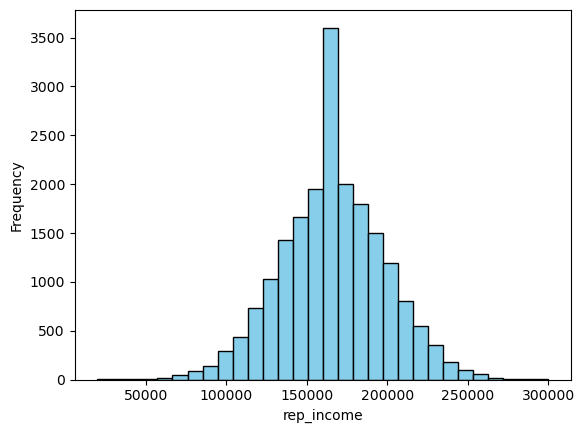

In [71]:
print('The mean of rep_income is : ', loan['rep_income'].mean())
print('The median of rep_income is : ', loan['rep_income'].median())

#plot
plt.hist(loan['rep_income'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('rep_income')
plt.ylabel('Frequency')
plt.show()


## e. Highschool is the education level that is more likely to default on loans

In [72]:
# calculate the mean (basically between 0 and 1)
# because 'Def_ind' = 1 is default so the higher the mean is, the more likely to default the level is.
loan.groupby('rep_education')['Def_ind'].mean().sort_values(ascending=False)

rep_education
high_school    0.115732
college        0.096968
graduate       0.081879
other          0.077465
Name: Def_ind, dtype: float64

## f. Correlation checking 

#### Based on the correlation heatmap below, there are correlation between several variables.

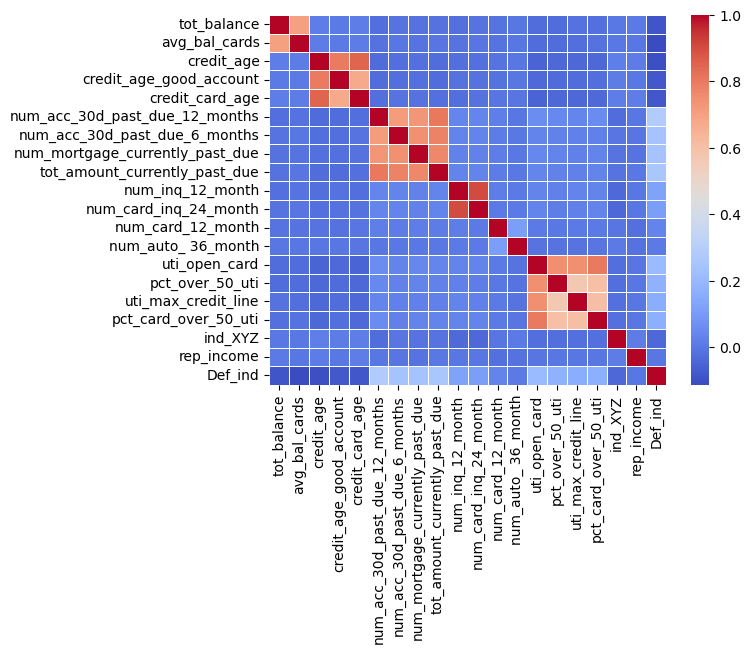

In [73]:
correlation_matrix = loan.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

# 2. Training and testing sets

In [74]:
X = loan.drop('Def_ind', axis=1)  # remove response variable

# one-hot encoding on the 'rep_education' column as 'rep_education' is categorical variable, 
X = pd.get_dummies(X, columns=['rep_education'], drop_first=True) 

y = loan['Def_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #80% of the data is the traing set

# 3. Model

In [75]:
LRmodel = LogisticRegression()

LRmodel.fit(X_train, y_train) #fit the model
y_pred = LRmodel.predict(X_test) #make predictions

#evaluation metrics

print(" Accuracy score ~ the model is correct in ", metrics.accuracy_score(y_test, y_pred) * 100 , '% of its predictions.')
print("NOTE: In this case, the classes are imbalance so Accuracy score is not a good metric to evaluate the model")

print(" Precision score ~ ", metrics.precision_score(y_test, y_pred)* 100 , '% of positive predictions are correct.')
print(" Recall score ~ The model captures", metrics.recall_score(y_test, y_pred)* 100 , '% of actual positive cases.')

 Accuracy score ~ the model is correct in  90.64999999999999 % of its predictions.
NOTE: In this case, the classes are imbalance so Accuracy score is not a good metric to evaluate the model
 Precision score ~  72.72727272727273 % of positive predictions are correct.
 Recall score ~ The model captures 10.025062656641603 % of actual positive cases.


#### In this case, the classes are imbalance so Accuracy score is not a good metric to evaluate the model
#### The model has a relatively low rate of false positives, making it useful when it predicts positive cases.
#### The low recall score indicates that the model struggles to identify the majority of positive cases in the imbalanced dataset.

# 4. Confusion Matrix


Recall that 'Def_ind' = 1 is defaulted and 'Def_ind' = 0 is not defaulted


In [76]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

print("True Positives:", matrix[1, 1], "(when Model correctly predicts the case is defaulted)")
print("True Negatives:", matrix[0, 0], "(when Model correctly predicts the case is not defaulted)")
print("False Positives:", matrix[0, 1], "(when the Model predicts the case is default but the case is not default) <-- Type 1 error")
print("False Negatives:", matrix[1, 0], "(when the Model predicts the case is not default but the case is default) <-- Type 2 error")

True Positives: 40 (when Model correctly predicts the case is defaulted)
True Negatives: 3586 (when Model correctly predicts the case is not defaulted)
False Positives: 15 (when the Model predicts the case is default but the case is not default) <-- Type 1 error
False Negatives: 359 (when the Model predicts the case is not default but the case is default) <-- Type 2 error


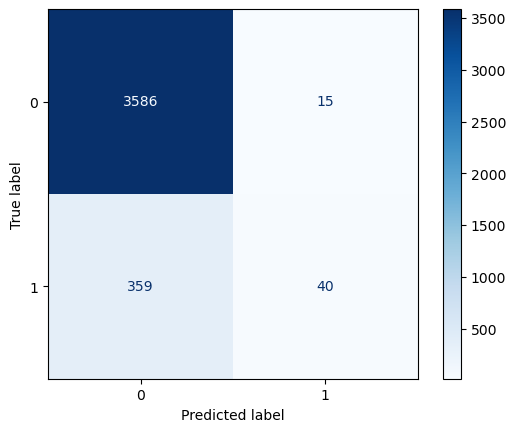

In [77]:
metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=LRmodel.classes_).plot(cmap="Blues")

# 5. ROC/AUC curve

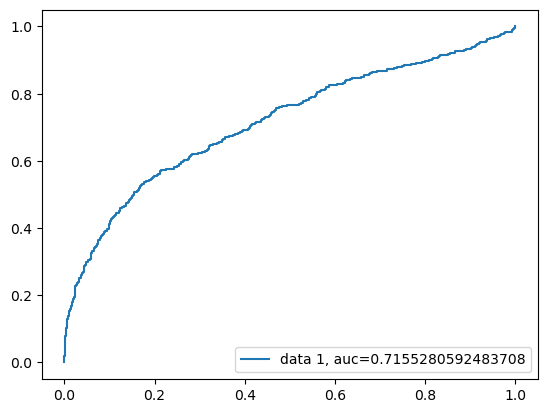

In [78]:
y_proba = LRmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#### A ROC curve on the left-top corner corresponds to a higher AUC value. 

# 6. "credit_age" is the most important for predicting default status 

In [79]:
coef = LRmodel.coef_
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coef[0]})
#the higher absolute value of coef is, the more important the feature is
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs() 
coef_df.sort_values(by='Abs_Coefficient', ascending=False)

,Feature,Coefficient,Abs_Coefficient
2,credit_age,-2.264070e-03,2.264070e-03
4,credit_card_age,-1.831998e-03,1.831998e-03
3,credit_age_good_account,-9.497418e-04,9.497418e-04
8,tot_amount_currently_past_due,2.542533e-04,2.542533e-04
1,avg_bal_cards,-1.105739e-04,1.105739e-04
10,num_card_inq_24_month,5.397161e-05,5.397161e-05
9,num_inq_12_month,3.538023e-05,3.538023e-05
5,num_acc_30d_past_due_12_months,1.071165e-05,1.071165e-05
13,uti_open_card,6.784717e-06,6.784717e-06
15,uti_max_credit_line,5.135767e-06,5.135767e-06


# Part 2 - Linear Discriminant Analysis (LDA) – Multiclass Classification. 

In [80]:
mobile = pd.read_csv("https://raw.githubusercontent.com/KennedyOdongo/DATA-300-Statistical-Machine-Learning-Fall-2023-/main/Data/mobile_phone_prices.csv")

# 1. EDA

In [81]:
mobile.columns, mobile.shape, mobile.dtypes #20000 rows and 21 columns

(Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
        'four_g', 'int_memory', 'mobile_depth', 'mobile_weight',
        'number_of cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
        'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 (2000, 21),
 battery_power        int64
 bluetooth            int64
 clock_speed        float64
 dual_sim             int64
 front_camera         int64
 four_g               int64
 int_memory           int64
 mobile_depth       float64
 mobile_weight        int64
 number_of cores      int64
 pc                   int64
 px_height            int64
 px_width             int64
 ram                  int64
 sc_h                 int64
 sc_w                 int64
 talk_time            int64
 three_g              int64
 touch_screen         int64
 wifi                 int64
 price_range          int64
 dtype: object)

### there is no missing value

In [82]:
mobile.isna().sum() 

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

### classes are balance

In [83]:
mobile['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# 2. Training and testing sets

In [84]:
X = mobile.drop('price_range', axis=1)  # remove response variable

y = mobile['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #80% of the data is the traing set

# 3. Model

In [85]:
LDAmodel = LinearDiscriminantAnalysis()

LDAmodel.fit(X_train, y_train) #fit the model
y_pred = LDAmodel.predict(X_test) #make predictions

#evaluation metrics
print(" Accuracy score ~ the model is correct in ", metrics.accuracy_score(y_test, y_pred) * 100 , '% of its predictions.')
print(" Precision score ~ ", metrics.precision_score(y_test, y_pred, average='micro')* 100 , '% of positive predictions are correct.')
print(" Recall score ~ The model captures", metrics.recall_score(y_test, y_pred, average='micro')* 100 , '%of actual positive cases.')

 Accuracy score ~ the model is correct in  94.0 % of its predictions.
 Precision score ~  94.0 % of positive predictions are correct.
 Recall score ~ The model captures 94.0 %of actual positive cases.


### Overall, based on these scores, the model appears to perform well.

# 4. Confusion Matrix

#### Interpreting this confusion matrix
- TP -> when it is predicted to be class A and it is actually class A)
- TN -> when it is predicted to be not class A aka predicted to be other classes and it is actually other classes)
(TN = sum - (FP + FN + TP))
- FP -> when it is predicted to be class A but it is not class A)
- FN -> when it is predicted to be not class A aka predicted to be other classes but it is actually class A)

In [86]:
LDAmatrix = metrics.confusion_matrix(y_test, y_pred)
LDAmatrix

num_classes = 4  # You should replace this with the actual number of classes

for class_num in range(num_classes):
    #extract TP,TN,FP, FN
    TP = LDAmatrix[class_num, class_num]
    #FP = sum of column of predicted num_classes - TP
    FP = np.sum(LDAmatrix[:, class_num]) - TP
    #FN = sum of column of actual num_classes - TP
    FN = np.sum(LDAmatrix[class_num, :]) - TP
    #TN = sum of matrix - (FP + FN + TP)
    TN =  np.sum(LDAmatrix) - (FP + FN + TP)

    #print
    print("FOR CLASS", class_num)
    print("- TP ->", TP, "(when it is predicted to be class", class_num, "and it is actually class", class_num, ")")
    print("- TN ->", TN, "(when it is predicted to be not class", class_num, "aka predicted to be other classes and it is actually other classes)")
    print("- FP ->", FP, "(when it is predicted to be class", class_num, "but it is not class", class_num, ")")
    print("- FN ->", FN, "(when it is predicted to be not class", class_num, "aka predicted to be other classes but it is actually class", class_num, ")")
    print()

FOR CLASS 0
- TP -> 85 (when it is predicted to be class 0 and it is actually class 0 )
- TN -> 308 (when it is predicted to be not class 0 aka predicted to be other classes and it is actually other classes)
- FP -> 3 (when it is predicted to be class 0 but it is not class 0 )
- FN -> 4 (when it is predicted to be not class 0 aka predicted to be other classes but it is actually class 0 )

FOR CLASS 1
- TP -> 101 (when it is predicted to be class 1 and it is actually class 1 )
- TN -> 285 (when it is predicted to be not class 1 aka predicted to be other classes and it is actually other classes)
- FP -> 9 (when it is predicted to be class 1 but it is not class 1 )
- FN -> 5 (when it is predicted to be not class 1 aka predicted to be other classes but it is actually class 1 )

FOR CLASS 2
- TP -> 100 (when it is predicted to be class 2 and it is actually class 2 )
- TN -> 283 (when it is predicted to be not class 2 aka predicted to be other classes and it is actually other classes)
- FP -

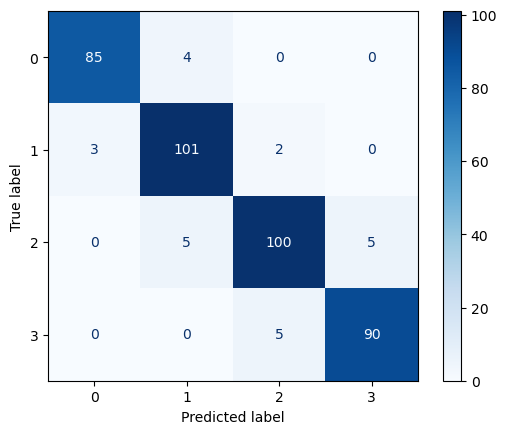

In [87]:
metrics.ConfusionMatrixDisplay(confusion_matrix=LDAmatrix, display_labels=LDAmodel.classes_).plot(cmap="Blues")
